In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline


<h1>Purpose of the Project</h1>
<br>
The goal of this project is to analyze, through supervised learning, any kinds of relations between monthly average
urban Consumer Price Index, price of grocery items, and time in the United States. I will be using singular and multiple
linear regression through Ordinary Least Squares to predict causal relationships between individual grocery items, the
monthly CPI, and the months and years that each of these attributes are being evaluated. 

I will be using data from the Federal Reserve Economic Data (FRED) Site from the St. Louis Federal Reserve Branch, which 
has more than 100 years of financial data on the average monthly price of bread, milk, etc. The goal of the project is to 
evaluate what effects that raising the prices of grocery items have become in response to raising the urban Consumer Price 
Index (CPI) on urban areas in the United States. The data collected and cleaned is based on a rolling monthly average. 



<h2>About the Data</h2>
<br>
The datasets are compilations of grocery items' monthly average prices in urban areas of the United States. 

There were some empty data points with each of the CSV files that I was working with, but they have been edited to make 
sure that any empty values were filled or removed accordingly. There were six CSV files combined into one CSV file 
containing all of the columns of average grocery items' prices. The dates were also reformatted in the CSV files using
Microsoft Excel where the dates, initially listed in its respective column in the form <b>M/D/YYYY</b> are now listed in 
the form <b>YYYY-MM-DD</b>.

There are seven columns, one of which is a date consisting of a month and year. 
By default, the day of the month had already been preset by FRED to the first day of each month for 300 months, or 25 
years, from February 1999 to February 2024, which was the last month of recorded data on monthly average urban prices. 

The grocery items being compared and run through for modeling are: 
white bread, ground beef, eggs, whole milk, and bananas. 
Another column, urban_cpi, is the average urban Consumer Price Index (CPI) for spending on groceries in urban US areas. 



<h2>Data Preparation</h2>
<br>
All data editing and preparation was done prior to evaluating and/or modeling on any of its contents using Microsoft Excel.
For each of the grocery items being evaluated and inputted for modeling, collections of monthly average prices began as 
early as 1985 for items. The monthly average urban CPI had data collected since January 1913. 

Since the analysis and modeling are for patterns and trends in the last 25 years, original files were modified and redacted
to only present data for all six attributes listed above from February 1999 to February 2024. 


<h2>Supervised Learning Models Used</h2>
<br>

In this analysis, I will use linear regression modeling with Ordinary Least-Squares (OLS) Regression. 
This will be done by using the ````statsmodels```` library in Python with ```ols```. 

Scikit-learn (```sklearn```) will also be used for select linear regression models as well as for splitting up the data 
into training and testing sets using the ```train_test_split``` method. 


In [2]:
# Call the CSV file and read it. Then return its basic structural info. 
groceries_df = pd.read_csv("fred_groceries_021999_022024.csv", encoding='utf-8')
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         301 non-null    object 
 1   white_bread  301 non-null    float64
 2   ground_beef  301 non-null    float64
 3   egg          301 non-null    float64
 4   whole_milk   301 non-null    float64
 5   banana       301 non-null    float64
 6   urban_cpi    301 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.6+ KB


In [3]:
# groceries_df.urban_cpi

In [4]:
# Add a column for signifying the number of each month (300 in total)
month= np.arange(0, len(groceries_df.DATE), 1, dtype=int)
# month
groceries_df['month_number'] = month
groceries_df['month_number'].head()

0    0
1    1
2    2
3    3
4    4
Name: month_number, dtype: int32

In [5]:
# To refresh, these are the descriptive statistics of the table
groceries_df.describe()

,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi,month_number
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,1.297900,2.999774,1.651575,3.289449,0.561970,227.267920,150.000000
std,0.258624,1.078457,0.579640,0.392196,0.049593,42.223027,87.035433
min,0.878000,0.000000,0.838000,2.656000,0.469000,163.300000,0.000000
25%,1.046000,2.196000,1.257000,2.964000,0.509000,190.400000,75.000000
50%,1.358000,2.818000,1.599000,3.241000,0.574000,229.554000,150.000000
75%,1.419000,3.841000,1.920000,3.557000,0.601000,251.238000,225.000000
max,2.033000,5.353000,4.823000,4.218000,0.643000,327.731000,300.000000


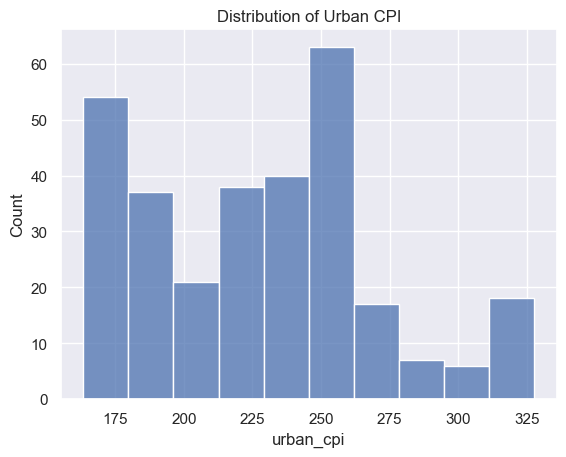

In [6]:
sns.histplot(groceries_df['urban_cpi'])
plt.title('Distribution of Urban CPI')
plt.show()

In [7]:
# Perform single linear regresssion on each of the columns 
# with respect to Average Urban Consumer Price Index in US
# Create X, y variables

X = sm.add_constant(groceries_df)
y = groceries_df['urban_cpi']

# Create train and test data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Get the linear regression model summary 
# using Ordinary Linear Squares (OLS) from statsmodels
lr_model = smf.ols(formula="urban_cpi ~ white_bread", data=X_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1705.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.69e-110
Time:                        18:21:52   Log-Likelihood:                -991.25
No. Observations:                 240   AIC:                             1986.
Df Residuals:                     238   BIC:                             1993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.1750      4.895      5.961      0.000      19.533      38.817
white_bread   152.2903      3.688     41.290      0.000     145.024     159.556
==============================================================================
Omnibus:                        8.429   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.079
Skew:                           0.400   Prob(JB):                       0.0176
Kurtosis:                       2.590   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
lr_preds = lr_model.predict(X_test)
lr_model.predict(X_test)

223    234.614584
150    253.650872
226    229.589004
296    334.060152
52     175.525946
          ...    
137    236.289777
227    224.258843
26     182.683590
106    224.106553
92     196.237427
Length: 61, dtype: float64

In [10]:
lr_model.fittedvalues

74     182.074429
239    223.192811
64     178.267172
294    329.186863
286    314.414703
          ...    
251    234.919165
192    247.711550
117    238.878713
47     187.861461
172    248.320711
Length: 240, dtype: float64

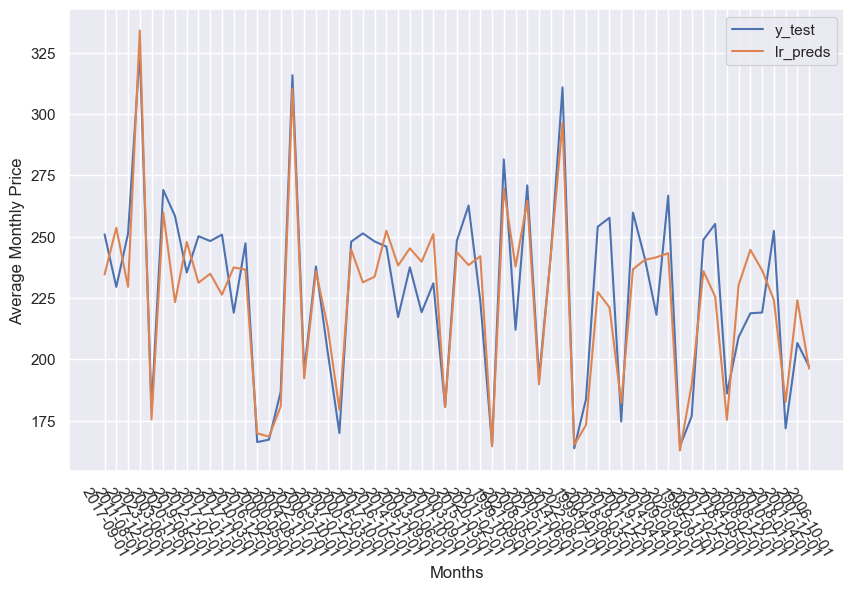

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X_test['DATE'], y_test, label='y_test')
ax.plot(X_test['DATE'], lr_preds, label='lr_preds')
# ax.plot(y_test, lr_preds, label='comparison')
# ax.plot(X_test['DATE'], lr_preds, label='lr_preds')
plt.xlabel("Months")
plt.ylabel("Average Monthly Price")
plt.xticks(rotation=-60, ha='center')
plt.legend()
plt.show()

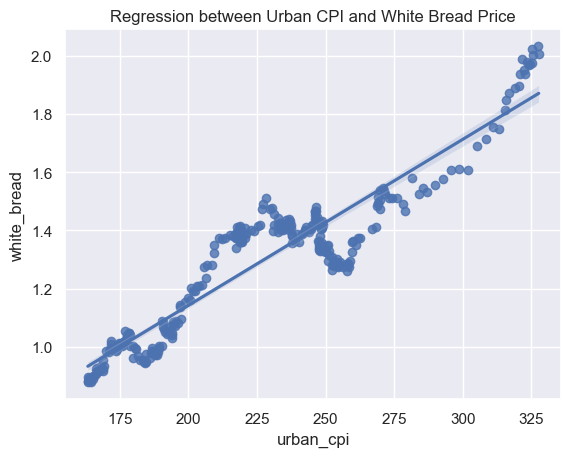

In [12]:
sns.regplot(x='urban_cpi', y='white_bread', data=groceries_df)
plt.title("Regression between Urban CPI and White Bread Price")
plt.show()

In [13]:
lr_model_beef = smf.ols(formula="urban_cpi ~ ground_beef", data=X_train).fit()
lr_model_beef.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     2038.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.11e-118
Time:                        18:21:55   Log-Likelihood:                -972.26
No. Observations:                 240   AIC:                             1949.
Df Residuals:                     238   BIC:                             1955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     116.0974      2.621     44.289      0.000     110.933     121.261
ground_beef    37.0788      0.821     45.144      0.000      35.461      38.697
==============================================================================
Omnibus:                      182.554   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4529.403
Skew:                           2.633   Prob(JB):                         0.00
Kurtosis:                      23.621   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
lr_preds_beef = lr_model_beef.predict(X_test)
lr_preds_beef

223    253.548465
150    220.622491
226    253.585544
296    309.871161
52     187.733596
          ...    
137    207.051651
227    251.101264
26     181.467279
106    198.931394
92     197.893187
Length: 61, dtype: float64

In [15]:
lr_model_beef.fittedvalues

74     201.712304
239    257.033872
64     193.147101
294    304.309341
286    294.075593
          ...    
251    260.185570
192    273.237308
117    203.492086
47     179.947048
172    241.497855
Length: 240, dtype: float64

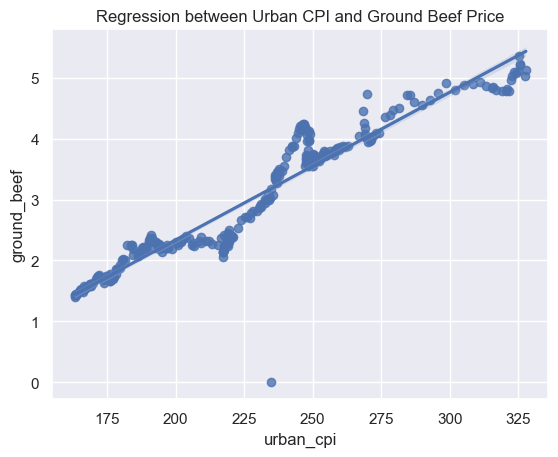

In [16]:
sns.regplot(x='urban_cpi', y='ground_beef', data=groceries_df)
plt.title("Regression between Urban CPI and Ground Beef Price")
plt.show()

In [17]:
lr_model_egg = smf.ols(formula="urban_cpi ~ egg", data=X_train).fit()
lr_model_egg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     291.8
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           3.08e-43
Time:                        18:21:56   Log-Likelihood:                -1147.2
No. Observations:                 240   AIC:                             2298.
Df Residuals:                     238   BIC:                             2305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.4136      5.525     25.053      0.000     127.530     149.297
egg           53.4937      3.132     17.081      0.000      47.324      59.663
==============================================================================
Omnibus:                       19.382   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.551
Skew:                           0.748   Prob(JB):                     1.27e-05
Kurtosis:                       2.869   Cond. No.                         6.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
lr_preds_egg = lr_model_egg.predict(X_test)
lr_preds_egg

223    214.481638
150    229.941320
226    235.504666
296    249.252550
52     202.552540
          ...    
137    215.498018
227    233.043955
26     193.405116
106    250.696880
92     205.655175
Length: 61, dtype: float64

In [19]:
lr_model_egg.fittedvalues

74     200.680260
239    221.542808
64     208.543836
294    247.701232
286    365.761852
          ...    
251    216.567892
192    250.108449
117    236.735021
47     201.268691
172    237.858389
Length: 240, dtype: float64

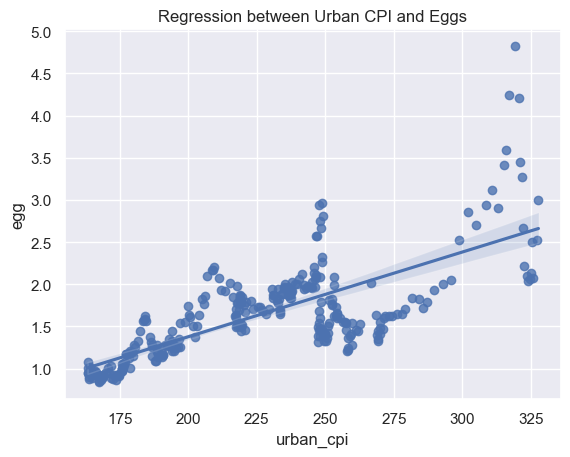

In [20]:
sns.regplot(x='urban_cpi', y='egg', data=groceries_df)
plt.title("Regression between Urban CPI and Eggs")
plt.show()

In [21]:
lr_model_milk = smf.ols(formula="urban_cpi ~ whole_milk", data=X_train).fit()
lr_model_milk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     262.1
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           3.00e-40
Time:                        18:21:57   Log-Likelihood:                -1154.1
No. Observations:                 240   AIC:                             2312.
Df Residuals:                     238   BIC:                             2319.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.8142     16.054     -1.919      0.056     -62.441       0.813
whole_milk    78.3447      4.839     16.189      0.000      68.811      87.878
==============================================================================
Omnibus:                        4.496   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.461
Skew:                           0.172   Prob(JB):                        0.177
Kurtosis:                       2.523   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lr_preds_milk = lr_model_milk.predict(X_test)
lr_preds_milk

223    220.593818
150    260.079533
226    216.363206
296    276.845293
52     178.836108
          ...    
137    228.741664
227    201.164339
26     192.076357
106    272.379647
92     209.233841
Length: 61, dtype: float64

In [23]:
lr_model_milk.fittedvalues

74     221.847333
239    197.403795
64     249.189624
294    276.845293
286    299.095180
          ...    
251    224.040984
192    243.078739
117    261.724771
47     179.619554
172    240.101642
Length: 240, dtype: float64

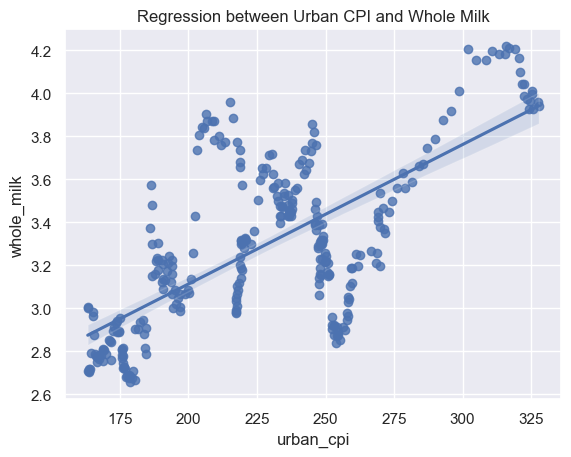

In [24]:
sns.regplot(x='urban_cpi', y='whole_milk', data=groceries_df)
plt.title("Regression between Urban CPI and Whole Milk")
plt.show()

In [25]:
lr_model_banana = smf.ols(formula="urban_cpi ~ banana", data=X_train).fit()
lr_model_banana.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     437.9
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           7.36e-56
Time:                        18:21:58   Log-Likelihood:                -1118.0
No. Observations:                 240   AIC:                             2240.
Df Residuals:                     238   BIC:                             2247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -158.8139     18.523     -8.574      0.000    -195.303    -122.325
banana       686.1932     32.793     20.925      0.000     621.591     750.795
==============================================================================
Omnibus:                        1.096   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.202
Skew:                          -0.130   Prob(JB):                        0.548
Kurtosis:                       2.771   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
lr_preds_banana = lr_model_banana.predict(X_test)
lr_preds_banana

223    214.475165
150    257.019143
226    224.081870
296    270.743006
52     198.692722
          ...    
137    241.236699
227    230.943801
26     178.793119
106    201.437494
92     176.734539
Length: 61, dtype: float64

In [27]:
lr_model_banana.fittedvalues

74     186.341244
239    236.433347
64     182.910278
294    274.173972
286    272.115393
          ...    
251    232.316188
192    246.726245
117    270.743006
47     202.123687
172    254.960563
Length: 240, dtype: float64

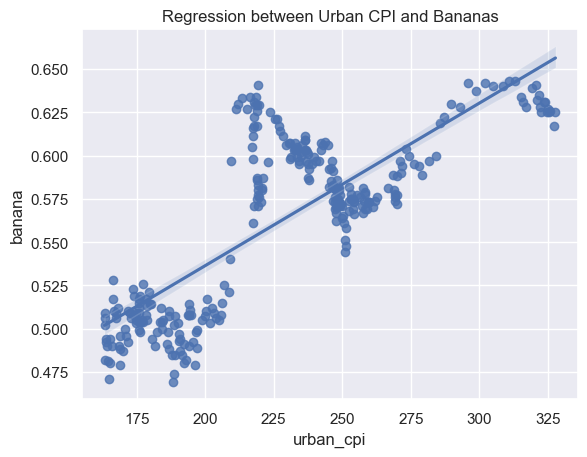

In [28]:
sns.regplot(x='urban_cpi', y='banana', data=groceries_df)
plt.title("Regression between Urban CPI and Bananas")
plt.show()

In [29]:
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(X_test['DATE'], y_test, label='y_test')
# ax.plot(X_test['DATE'], lr_preds, label='lr_preds')
# # ax.plot(y_test, lr_preds, label='comparison')
# # ax.plot(X_test['DATE'], lr_preds, label='lr_preds')
# plt.xticks(rotation=-60, ha='center')
# plt.legend()
# plt.show()

In [30]:

df_no_dates = groceries_df
df_no_dates = df_no_dates.drop(columns=['DATE'], axis=1)
df_no_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   white_bread   301 non-null    float64
 1   ground_beef   301 non-null    float64
 2   egg           301 non-null    float64
 3   whole_milk    301 non-null    float64
 4   banana        301 non-null    float64
 5   urban_cpi     301 non-null    float64
 6   month_number  301 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 15.4 KB


In [31]:
# Splitting variables from df_no_dates
# Modify X, y
# Dates have been removed for comparison and analysis of the LinearRegression() 
# model offered through sklearn

X_nd = df_no_dates.iloc[:, 1:]  # independent
y_nd = df_no_dates.iloc[:, 1:]  # dependent

In [32]:
print(X_nd.shape, y_nd.shape)

(301, 6) (301, 6)


In [33]:
# Modify the X y train and test sets
# Use a 80-20 split
X_train_nd, X_test_nd, y_train_nd, y_test_nd = train_test_split(X_nd, y_nd, test_size = 0.2, random_state = 0)


In [34]:
lr_sklrn = LinearRegression()
lr_sklrn.fit(X_train_nd, y_train_nd)

LinearRegression()

In [35]:
# Prediction result
y_pred_test = lr_sklrn.predict(X_test_nd)     # predicted value of y_test
y_pred_train = lr_sklrn.predict(X_train_nd)   # predicted value of y_train

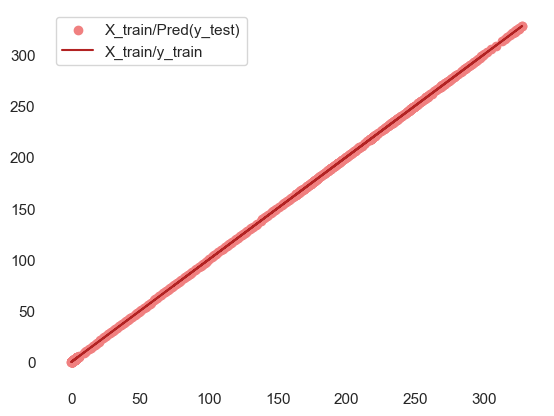

In [36]:
# Prediction on training set
plt.scatter(X_train_nd, y_train_nd, color = 'lightcoral')
plt.plot(X_train_nd, y_pred_train, color = 'firebrick')
# plt.title('Salary vs Experience (Training Set)')
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], loc='best', facecolor='white')
plt.box(False)
plt.show()

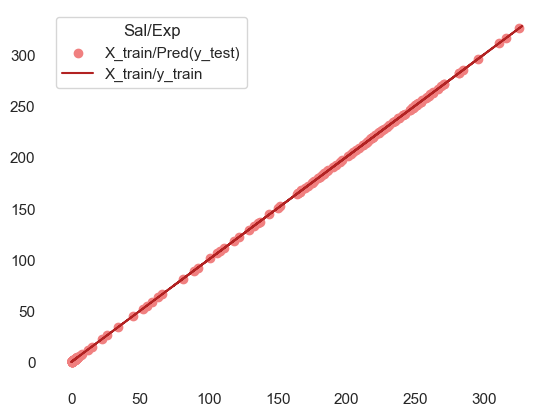

In [37]:
# # Prediction on test set
plt.scatter(X_test_nd, y_test_nd, color = 'lightcoral')
plt.plot(X_train_nd, y_pred_train, color = 'firebrick')
# plt.title('Salary vs Experience (Test Set)')
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

<h1>Conclusion</h1>
<br>
We can see that all of the five grocery items picked for this evaluation have had their average prices increased over the 
25-year period. 



<h1>References</h1>

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Processed Foods and Feeds: Fluid Whole Milk [WPU02310301], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU02310301, April 28, 2024.

U.S. Bureau of Labor Statistics, Average Price: Bread, White, Pan (Cost perPound/453.6 Grams) in U.S. City Average [APU0000702111], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/APU0000702111, April 23, 2024.

U.S. Bureau of Labor Statistics, Average Price: Ground Beef, 100% Beef (Cost perPound/453.6 Grams) in U.S. City Average [APU0000703112], retrieved from FRED,Federal Reserve Bank of St. Louis;https://fred.stlouisfed.org/series/APU0000703112, April 8, 2024.

U.S. Bureau of Labor Statistics, Average Price: Eggs, Grade A, Large (Cost per Dozen)in U.S. City Average [APU0000708111], retrieved from FRED, Federal Reserve Bankof St. Louis; https://fred.stlouisfed.org/series/APU0000708111, March 27, 2024.

U.S. Bureau of Labor Statistics, Average Price: Bananas (Cost per Pound/453.6Grams) in U.S. City Average [APU0000711211], retrieved from FRED, Federal ReserveBank of St. Louis; https://fred.stlouisfed.org/series/APU0000711211, April 12, 2024.

U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: Foodin U.S. City Average [CPIUFDNS], retrieved from FRED, Federal Reserve Bank of St.Louis; https://fred.stlouisfed.org/series/CPIUFDNS, April 23, 2024.


